In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [5]:
data=pd.read_csv('C:/Users/hp/Downloads/Analytics Vidhya/Loan Prediction/train_ctrUa4K.csv')
test_data=pd.read_csv('C:/Users/hp/Downloads/Analytics Vidhya/Loan Prediction/test_lAUu6dG.csv')

In [6]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [7]:
    TYPE OF VARIABLE         DATA TYPE       VARIABLE CATEGORY
    
    Predictor varible      Char type             Categorical
    Gender                 Gender                Gender  
    Married                Married               Married
    Dependents             Education             Education
    Education              Self_Employed         Self_Employed
    Self_Employed          Property_Area         Property_Area
    ApplicantIncome        Loan_Satus            Loan_Satus
    CoapplicantIncome                            Credit_History
    LoanAmount             Numeric Type          Dependents 
    Loan_Amount_term       ApplicantIncome  
    Credit_History         LoanAmount            Continuous
    Property_Area          Loan_Amount_term       ApplicantIncome
                           Credit_History         LoanAmount
    Target Variable        Dependents             Loan_Amount_term
    Loan_Status            CoapplicantIncome      CoapplicantIncome

SyntaxError: invalid syntax (<ipython-input-7-3ee7da14750e>, line 1)

In [8]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.4+ KB


In [10]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
Loan_ID              367 non-null object
Gender               356 non-null object
Married              367 non-null object
Dependents           357 non-null object
Education            367 non-null object
Self_Employed        344 non-null object
ApplicantIncome      367 non-null int64
CoapplicantIncome    367 non-null int64
LoanAmount           362 non-null float64
Loan_Amount_Term     361 non-null float64
Credit_History       338 non-null float64
Property_Area        367 non-null object
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


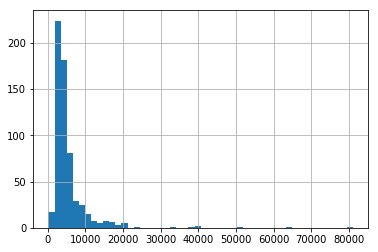

In [11]:
data['ApplicantIncome'].hist(bins=50)

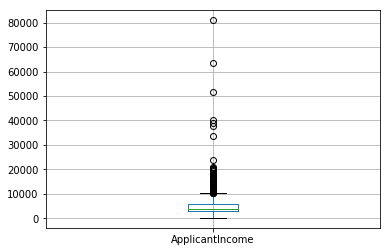

In [12]:
data.boxplot(column='ApplicantIncome')

In [13]:
print(data['Loan_Amount_Term'].value_counts())

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64


So, Loan_Amount_Term is also a categorical data not continuous .

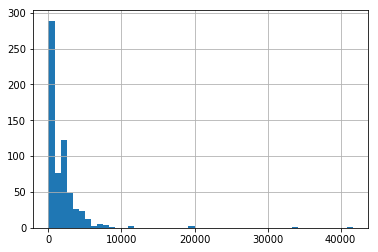

In [14]:
data['CoapplicantIncome'].hist(bins=50)

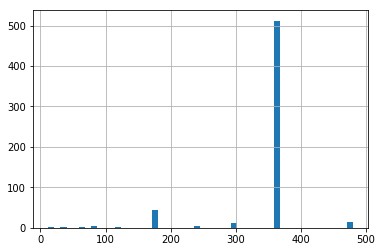

In [15]:
data['Loan_Amount_Term'].hist(bins=50)

In [16]:
print(data['Credit_History'].value_counts())

1.0    475
0.0     89
Name: Credit_History, dtype: int64


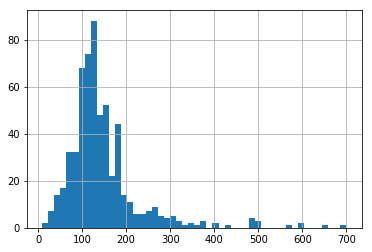

In [17]:
data['LoanAmount'].hist(bins=50)

In [18]:
import scipy.stats as st

In [19]:
data.corr(method='pearson')

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.116605,0.570909,-0.045306,-0.014715
CoapplicantIncome,-0.116605,1.000000,0.188619,-0.059878,-0.002056
LoanAmount,0.570909,0.188619,1.000000,0.039447,-0.008433
Loan_Amount_Term,-0.045306,-0.059878,0.039447,1.000000,0.001470
Credit_History,-0.014715,-0.002056,-0.008433,0.001470,1.000000


In [20]:
pd.crosstab(data["Credit_History"],data["Loan_Status"],margins=True)

Loan_Status,N,Y,All
Credit_History,,,
0.0,82,7,89
1.0,97,378,475
All,179,385,564


In [21]:
def perConvert(ser):
    return ser/float(ser[-1])
pd.crosstab(data["Credit_History"],data["Loan_Status"],margins=True).apply(perConvert,axis=1)   

Loan_Status,N,Y,All
Credit_History,,,
0.0,0.921348,0.078652,1.0
1.0,0.204211,0.795789,1.0
All,0.317376,0.682624,1.0


In [22]:
pd.crosstab(data["Loan_Amount_Term"],data["Loan_Status"],margins=True).apply(perConvert,axis=1)   

Loan_Status,N,Y,All
Loan_Amount_Term,,,
12.0,0.000000,1.000000,1.0
36.0,1.000000,0.000000,1.0
60.0,0.000000,1.000000,1.0
84.0,0.250000,0.750000,1.0
120.0,0.000000,1.000000,1.0
180.0,0.340909,0.659091,1.0
240.0,0.250000,0.750000,1.0
300.0,0.384615,0.615385,1.0
360.0,0.298828,0.701172,1.0


In [23]:
pd.crosstab(data["Education"],data["Loan_Status"],margins=True).apply(perConvert,axis=1)   

Loan_Status,N,Y,All
Education,,,
Graduate,0.291667,0.708333,1.0
Not Graduate,0.388060,0.611940,1.0
All,0.312704,0.687296,1.0


In [24]:
pd.crosstab(data["Gender"],data["Loan_Status"],margins=True).apply(perConvert,axis=1)   

Loan_Status,N,Y,All
Gender,,,
Female,0.330357,0.669643,1.0
Male,0.306748,0.693252,1.0
All,0.311148,0.688852,1.0


In [25]:
pd.crosstab(data["Self_Employed"],data["Loan_Status"],margins=True).apply(perConvert,axis=1)   

Loan_Status,N,Y,All
Self_Employed,,,
No,0.314000,0.686000,1.0
Yes,0.317073,0.682927,1.0
All,0.314433,0.685567,1.0


In [26]:
print(data['Dependents'].value_counts(dropna=False))

0      345
1      102
2      101
3+      51
NaN     15
Name: Dependents, dtype: int64


In [27]:
pd.crosstab(data["Dependents"],data["Education"],margins=True).apply(perConvert,axis=1)   

Education,Graduate,Not Graduate,All
Dependents,,,
0,0.797101,0.202899,1.0
1,0.794118,0.205882,1.0
2,0.762376,0.237624,1.0
3+,0.705882,0.294118,1.0
All,0.782972,0.217028,1.0


In [28]:
print(data['Gender'].value_counts(dropna=False))

Male      489
Female    112
NaN        13
Name: Gender, dtype: int64


In [29]:
print(data['Married'].value_counts(dropna=False))

Yes    398
No     213
NaN      3
Name: Married, dtype: int64


In [30]:
print(data['Gender'].value_counts(dropna=False))

Male      489
Female    112
NaN        13
Name: Gender, dtype: int64


In [31]:
#First we import a function to determine the mode
from scipy.stats import mode
data['Gender'].fillna(data['Gender'].mode()[0],inplace=True)

In [32]:
test_data.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [33]:
#test_data['Gender'].fillna(test_data['Gender'].mode()[0],inplace=True)

In [34]:
data['Married'].fillna(data['Married'].mode()[0],inplace=True)


In [35]:
#test_data['Married'].fillna(test_data['Married'].mode()[0],inplace=True)


In [36]:
print(data['Self_Employed'].value_counts(dropna=False))

No     500
Yes     82
NaN     32
Name: Self_Employed, dtype: int64


In [37]:
data['Self_Employed'].fillna(data['Self_Employed'].mode()[0],inplace=True)


In [38]:
#test_data['Self_Employed'].fillna(test_data['Self_Employed'].mode()[0],inplace=True)


In [39]:
data.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents           15
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [40]:
test_data.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [41]:
pd.crosstab(data["Dependents"],data["Gender"],margins=True).apply(perConvert,axis=1)   

Gender,Female,Male,All
Dependents,,,
0,0.231884,0.768116,1.0
1,0.186275,0.813725,1.0
2,0.069307,0.930693,1.0
3+,0.058824,0.941176,1.0
All,0.181970,0.818030,1.0


In [42]:
data['Dependents'].fillna(data['Dependents'].mode()[0],inplace=True)


In [43]:
data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mode()[0],inplace=True)


In [44]:
data.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term      0
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [45]:
pd.crosstab(data["Credit_History"],data["Education"],margins=True).apply(perConvert,axis=1)   

Education,Graduate,Not Graduate,All
Credit_History,,,
0.0,0.707865,0.292135,1.0
1.0,0.800000,0.200000,1.0
All,0.785461,0.214539,1.0


In [46]:
pd.crosstab(data["Credit_History"],data["Gender"],margins=True).apply(perConvert,axis=1)   

Gender,Female,Male,All
Credit_History,,,
0.0,0.191011,0.808989,1.0
1.0,0.176842,0.823158,1.0
All,0.179078,0.820922,1.0


In [47]:
print(data['Credit_History'].value_counts(dropna=False))

 1.0    475
 0.0     89
NaN      50
Name: Credit_History, dtype: int64


In [48]:
data['Credit_History'].fillna(data['Credit_History'].mode()[0],inplace=True)


In [49]:
data['LoanAmount'].fillna(data['LoanAmount'].mean(),inplace=True)


In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               614 non-null object
Married              614 non-null object
Dependents           614 non-null object
Education            614 non-null object
Self_Employed        614 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           614 non-null float64
Loan_Amount_Term     614 non-null float64
Credit_History       614 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.4+ KB


In [51]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

In [52]:
le = LabelEncoder()

In [53]:
X=data.iloc[:,:-1].values

In [54]:
print(X)

[['LP001002' 'Male' 'No' ... 360.0 1.0 'Urban']
 ['LP001003' 'Male' 'Yes' ... 360.0 1.0 'Rural']
 ['LP001005' 'Male' 'Yes' ... 360.0 1.0 'Urban']
 ...
 ['LP002983' 'Male' 'Yes' ... 360.0 1.0 'Urban']
 ['LP002984' 'Male' 'Yes' ... 360.0 1.0 'Urban']
 ['LP002990' 'Female' 'No' ... 360.0 0.0 'Semiurban']]


In [55]:
X[:,1]=le.fit_transform(X[:,1])

In [56]:
print(X)

[['LP001002' 1 'No' ... 360.0 1.0 'Urban']
 ['LP001003' 1 'Yes' ... 360.0 1.0 'Rural']
 ['LP001005' 1 'Yes' ... 360.0 1.0 'Urban']
 ...
 ['LP002983' 1 'Yes' ... 360.0 1.0 'Urban']
 ['LP002984' 1 'Yes' ... 360.0 1.0 'Urban']
 ['LP002990' 0 'No' ... 360.0 0.0 'Semiurban']]


In [57]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


In [58]:
X[:,2]=le.fit_transform(X[:,2])

In [59]:
X[:,3]=le.fit_transform(X[:,3])

In [60]:
X[:,4]=le.fit_transform(X[:,4])
X[:,5]=le.fit_transform(X[:,5])
X[:,11]=le.fit_transform(X[:,11])

In [61]:
print(X[0:5,:])

[['LP001002' 1 0 0 0 0 5849 0.0 146.41216216216216 360.0 1.0 2]
 ['LP001003' 1 1 1 0 0 4583 1508.0 128.0 360.0 1.0 0]
 ['LP001005' 1 1 0 0 1 3000 0.0 66.0 360.0 1.0 2]
 ['LP001006' 1 1 0 1 0 2583 2358.0 120.0 360.0 1.0 2]
 ['LP001008' 1 0 0 0 0 6000 0.0 141.0 360.0 1.0 2]]


In [62]:
df1=pd.DataFrame(X[:,1:12])
df1.head()

,0,1,2,3,4,5,6,7,8,9,10
0,1,0,0,0,0,5849,0,146.412,360,1,2
1,1,1,1,0,0,4583,1508,128,360,1,0
2,1,1,0,0,1,3000,0,66,360,1,2
3,1,1,0,1,0,2583,2358,120,360,1,2
4,1,0,0,0,0,6000,0,141,360,1,2


In [63]:
ohe=OneHotEncoder(categorical_features=[0])
df1=ohe.fit_transform(df1).toarray()

In [64]:
print(df1[0,:])


[0.00000000e+00 1.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 5.84900000e+03 0.00000000e+00
 1.46412162e+02 3.60000000e+02 1.00000000e+00 2.00000000e+00]


In [65]:
ohe=OneHotEncoder(categorical_features=[2])
df1=ohe.fit_transform(df1).toarray()
print(df1[0,:])


[1.00000000e+00 0.00000000e+00 0.00000000e+00 1.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 5.84900000e+03
 0.00000000e+00 1.46412162e+02 3.60000000e+02 1.00000000e+00
 2.00000000e+00]


In [66]:
ohe=OneHotEncoder(categorical_features=[4])
df1=ohe.fit_transform(df1).toarray()
print(df1[0,:])


[1.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 1.00000000e+00 0.00000000e+00 0.00000000e+00 1.00000000e+00
 0.00000000e+00 0.00000000e+00 5.84900000e+03 0.00000000e+00
 1.46412162e+02 3.60000000e+02 1.00000000e+00 2.00000000e+00]


In [67]:
ohe=OneHotEncoder(categorical_features=[8])
df1=ohe.fit_transform(df1).toarray()
print(df1[0,:])


[1.00000000e+00 0.00000000e+00 1.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 1.00000000e+00 0.00000000e+00
 0.00000000e+00 1.00000000e+00 0.00000000e+00 5.84900000e+03
 0.00000000e+00 1.46412162e+02 3.60000000e+02 1.00000000e+00
 2.00000000e+00]


In [68]:
ohe=OneHotEncoder(categorical_features=[10])
df1=ohe.fit_transform(df1).toarray()
print(df1[0,:])


[1.00000000e+00 0.00000000e+00 1.00000000e+00 0.00000000e+00
 1.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 1.00000000e+00 0.00000000e+00 0.00000000e+00 1.00000000e+00
 5.84900000e+03 0.00000000e+00 1.46412162e+02 3.60000000e+02
 1.00000000e+00 2.00000000e+00]


In [69]:
ohe=OneHotEncoder(categorical_features=[17])
df1=ohe.fit_transform(df1).toarray()

In [70]:
print(df1[0,:])


[0.00000000e+00 0.00000000e+00 1.00000000e+00 1.00000000e+00
 0.00000000e+00 1.00000000e+00 0.00000000e+00 1.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 1.00000000e+00
 0.00000000e+00 0.00000000e+00 1.00000000e+00 5.84900000e+03
 0.00000000e+00 1.46412162e+02 3.60000000e+02 1.00000000e+00]


In [71]:
print(data['Dependents'].unique())

['0' '1' '2' '3+']


In [72]:
x_train=pd.DataFrame(df1)

In [73]:
x_train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,5849.0,0.0,146.412162,360.0,1.0
1,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,4583.0,1508.0,128.000000,360.0,1.0
2,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,3000.0,0.0,66.000000,360.0,1.0
3,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,2583.0,2358.0,120.000000,360.0,1.0
4,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,6000.0,0.0,141.000000,360.0,1.0


In [74]:
y=data.iloc[:,-1].values
print(y[0:5,])

['Y' 'N' 'Y' 'Y' 'Y']


In [75]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


In [76]:
y_train=le.fit_transform(y)

In [77]:
print(y_train[0:10,])

[1 0 1 1 1 1 1 0 1 0]


In [78]:
dd=le.inverse_transform(y_train)
print(dd[0:5,])

['Y' 'N' 'Y' 'Y' 'Y']


C:\Users\hp\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [79]:
from sklearn.neighbors import KNeighborsClassifier

In [80]:
model=KNeighborsClassifier(n_neighbors=7)

In [81]:
model.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=7, p=2,
           weights='uniform')

In [82]:
model.score(x_train,y_train)

0.7263843648208469

In [83]:
prediction=model.predict(x_train)
res=le.inverse_transform(prediction)
print(res)

['Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'N' 'N'
 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y'
 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'N'
 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y'
 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y'
 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y'
 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y'
 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y'
 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y'
 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y'
 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y'
 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y'
 'Y' 'Y' 'N' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y'
 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [84]:
model1=KNeighborsClassifier(n_neighbors=2)
model1.fit(x_train,y_train)
model1.score(x_train,y_train)

0.7931596091205212

In [85]:
predicted1=model1.predict(x_train)
target1=le.inverse_transform(predicted1)
print(target1[0:5,])

['Y' 'N' 'Y' 'Y' 'Y']


C:\Users\hp\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [86]:
from sklearn import tree
tree_model=tree.DecisionTreeClassifier(criterion='gini')
tree_model.fit(x_train,y_train)
tree_model.score(x_train,y_train)

1.0

In [87]:
from sklearn.naive_bayes import GaussianNB
nbmodel=GaussianNB()
nbmodel.fit(x_train,y_train)
nbmodel.score(x_train,y_train)

0.7996742671009772

In [88]:
predicted2=nbmodel.predict(x_train)
target2=le.inverse_transform(predicted2)
print(target2[0:5,])

['Y' 'Y' 'Y' 'Y' 'Y']


C:\Users\hp\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [89]:
from sklearn import svm
svmmodel=svm.SVC()
svmmodel.fit(x_train,y_train)
svmmodel.score(x_train,y_train)

1.0

In [90]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
Loan_ID              367 non-null object
Gender               356 non-null object
Married              367 non-null object
Dependents           357 non-null object
Education            367 non-null object
Self_Employed        344 non-null object
ApplicantIncome      367 non-null int64
CoapplicantIncome    367 non-null int64
LoanAmount           362 non-null float64
Loan_Amount_Term     361 non-null float64
Credit_History       338 non-null float64
Property_Area        367 non-null object
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [91]:
print(test_data['Dependents'].value_counts(dropna=False))

0      200
2       59
1       58
3+      40
NaN     10
Name: Dependents, dtype: int64


In [92]:
test_data['Dependents'].fillna(data['Dependents'].mode()[0],inplace=True)


In [93]:
print(test_data['Dependents'].value_counts(dropna=False))

0     210
2      59
1      58
3+     40
Name: Dependents, dtype: int64


In [94]:
print(test_data['Loan_Amount_Term'].value_counts(dropna=False))

 360.0    311
 180.0     22
 480.0      8
 300.0      7
NaN         6
 240.0      4
 84.0       3
 6.0        1
 120.0      1
 36.0       1
 350.0      1
 12.0       1
 60.0       1
Name: Loan_Amount_Term, dtype: int64


In [95]:
test_data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mode()[0],inplace=True)


In [96]:
print(test_data['Loan_Amount_Term'].value_counts(dropna=False))

360.0    317
180.0     22
480.0      8
300.0      7
240.0      4
84.0       3
6.0        1
120.0      1
36.0       1
350.0      1
12.0       1
60.0       1
Name: Loan_Amount_Term, dtype: int64


In [97]:
print(test_data['Credit_History'].value_counts(dropna=False))

 1.0    279
 0.0     59
NaN      29
Name: Credit_History, dtype: int64


In [98]:
test_data['Credit_History'].fillna(test_data['Credit_History'].mode()[0],inplace=True)


In [99]:
test_data['LoanAmount'].fillna(test_data['LoanAmount'].mean(),inplace=True)


In [100]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
Loan_ID              367 non-null object
Gender               356 non-null object
Married              367 non-null object
Dependents           367 non-null object
Education            367 non-null object
Self_Employed        344 non-null object
ApplicantIncome      367 non-null int64
CoapplicantIncome    367 non-null int64
LoanAmount           367 non-null float64
Loan_Amount_Term     367 non-null float64
Credit_History       367 non-null float64
Property_Area        367 non-null object
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [101]:
test_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,1.0,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [102]:
Y=test_data.iloc[:,1:12].values
print(Y[0,0])

Male


In [103]:
print(Y[0,:])

['Male' 'Yes' '0' 'Graduate' 'No' 5720 0 110.0 360.0 1.0 'Urban']


In [104]:
l_e=LabelEncoder()

In [105]:
Y[:,0]=l_e.fit_transform(Y[:,0].astype(str))
Y[:,1]=l_e.fit_transform(Y[:,1])
Y[:,2]=l_e.fit_transform(Y[:,2])
Y[:,3]=l_e.fit_transform(Y[:,3])
Y[:,4]=l_e.fit_transform(Y[:,4].astype(str))
Y[:,10]=l_e.fit_transform(Y[:,10])

In [106]:
df2=pd.DataFrame(Y[:,0:11])
#df1.head()
df2.head()

,0,1,2,3,4,5,6,7,8,9,10
0,1,1,0,0,0,5720,0,110,360,1,2
1,1,1,1,0,0,3076,1500,126,360,1,2
2,1,1,2,0,0,5000,1800,208,360,1,2
3,1,1,2,0,0,2340,2546,100,360,1,2
4,1,0,0,1,0,3276,0,78,360,1,2


In [107]:
ohenc=OneHotEncoder(categorical_features=[0])
df2=ohenc.fit_transform(df2).toarray()

In [108]:
ohenc=OneHotEncoder(categorical_features=[2])
df2=ohenc.fit_transform(df2).toarray()

In [109]:
ohenc=OneHotEncoder(categorical_features=[4])
df2=ohenc.fit_transform(df2).toarray()

In [110]:
ohenc=OneHotEncoder(categorical_features=[8])
df2=ohenc.fit_transform(df2).toarray()

In [111]:
ohenc=OneHotEncoder(categorical_features=[10])
df2=ohenc.fit_transform(df2).toarray()

In [112]:
ohenc=OneHotEncoder(categorical_features=[17])
df2=ohenc.fit_transform(df2).toarray()

In [113]:
print(df2[0,:])

[0.00e+00 0.00e+00 1.00e+00 1.00e+00 0.00e+00 1.00e+00 0.00e+00 0.00e+00
 0.00e+00 1.00e+00 1.00e+00 0.00e+00 0.00e+00 1.00e+00 0.00e+00 5.72e+03
 0.00e+00 1.10e+02 3.60e+02 1.00e+00]


In [114]:
x_test=pd.DataFrame(df2)
x_test.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,5720.0,0.0,110.0,360.0,1.0
1,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,3076.0,1500.0,126.0,360.0,1.0
2,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,2.0,5000.0,1800.0,208.0,360.0,1.0
3,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,2.0,2340.0,2546.0,100.0,360.0,1.0
4,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,3276.0,0.0,78.0,360.0,1.0


In [115]:
predicted=model1.predict(x_test)

In [116]:
print(predicted[0:5,])

[1 1 0 1 1]


In [117]:
target=le.inverse_transform(predicted)

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [118]:
print(target[0:5,])

['Y' 'Y' 'N' 'Y' 'Y']


In [119]:
print(target)

['Y' 'Y' 'N' 'Y' 'Y' 'N' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y'
 'Y' 'N' 'Y' 'N' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'N' 'Y' 'N' 'Y'
 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'N' 'N' 'N' 'Y' 'Y' 'Y' 'N' 'Y'
 'N' 'N' 'N' 'N' 'Y' 'N' 'Y' 'Y' 'N' 'Y' 'Y' 'N' 'N' 'N' 'Y' 'N' 'Y' 'Y'
 'N' 'Y' 'Y' 'N' 'Y' 'N' 'N' 'N' 'N' 'N' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y'
 'N' 'Y' 'N' 'N' 'Y' 'N' 'N' 'N' 'Y' 'Y' 'Y' 'N' 'Y' 'N' 'Y' 'N' 'N' 'Y'
 'Y' 'Y' 'N' 'Y' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'Y'
 'N' 'N' 'N' 'Y' 'N' 'N' 'Y' 'Y' 'N' 'N' 'Y' 'N' 'N' 'Y' 'N' 'Y' 'N' 'N'
 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'N' 'N' 'N' 'Y' 'Y' 'Y' 'N' 'Y' 'N' 'N' 'N' 'N'
 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'N' 'N'
 'Y' 'N' 'Y' 'N' 'N' 'Y' 'Y' 'N' 'Y' 'N' 'Y' 'Y' 'N' 'Y' 'N' 'Y' 'N' 'Y'
 'N' 'N' 'Y' 'N' 'N' 'Y' 'Y' 'Y' 'N' 'N' 'N' 'N' 'N' 'N' 'Y' 'Y' 'N' 'Y'
 'Y' 'Y' 'N' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'N' 'Y' 'N' 'N'
 'Y' 'N' 'N' 'N' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'N

In [120]:
a=pd.DataFrame(target)

In [121]:
b=pd.concat([pd.DataFrame(test_data['Loan_ID']),a],axis=1)

In [122]:
help(pd.concat)

Help on function concat in module pandas.core.reshape.concat:

concat(objs, axis=0, join='outer', join_axes=None, ignore_index=False, keys=None, levels=None, names=None, verify_integrity=False, copy=True)
    Concatenate pandas objects along a particular axis with optional set logic
    along the other axes.
    
    Can also add a layer of hierarchical indexing on the concatenation axis,
    which may be useful if the labels are the same (or overlapping) on
    the passed axis number.
    
    Parameters
    ----------
    objs : a sequence or mapping of Series, DataFrame, or Panel objects
        If a dict is passed, the sorted keys will be used as the `keys`
        argument, unless it is passed, in which case the values will be
        selected (see below). Any None objects will be dropped silently unless
        they are all None in which case a ValueError will be raised
    axis : {0/'index', 1/'columns'}, default 0
        The axis to concatenate along
    join : {'inner', 'oute

In [123]:
b

,Loan_ID,0
0,LP001015,Y
1,LP001022,Y
2,LP001031,N
3,LP001035,Y
4,LP001051,Y
5,LP001054,N
6,LP001055,N
7,LP001056,Y
8,LP001059,Y
9,LP001067,Y


In [124]:
export_excel = b.to_excel (r'C:\Users\hp\Downloads\Loan Prediction\sample_submission_ho_gaya.xlsx', index = None, header=True) #Don't forget to add '.xlsx' at the end of the path


In [125]:
zipped=zip(predictor,target)
list(zipped)

NameError: name 'predictor' is not defined